In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import seaborn as sns
from sklearn.svm import SVC

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

EDA

In [ ]:
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [ ]:
df.describe(include="object")

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


In [ ]:
df.isna().sum()

,0
instance_id,5
artist_name,5
track_name,5
popularity,5
acousticness,5
danceability,5
duration_ms,5
energy,5
instrumentalness,5
key,5


In [ ]:
df_cleaned = df.dropna()
df_cleaned.reset_index(drop=True, inplace=True)

In [ ]:
to_encode = list(df_cleaned.select_dtypes(include="object").columns)

In [ ]:
le = LabelEncoder()

In [ ]:
df_cleaned[to_encode] = df_cleaned[to_encode].apply(le.fit_transform)

<ipython-input-12-81a3a5ff370c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[to_encode] = df_cleaned[to_encode].apply(le.fit_transform)


In [ ]:
df_numerical = df_cleaned.copy()
df_numerical

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,5029,28371,27.0,0.00468,0.652,-1.0,0.941,0.79200,1,0.115,-5.201,1,0.0748,274,3,0.759,5
1,46652.0,6117,34817,31.0,0.01270,0.622,218293.0,0.890,0.95000,5,0.124,-7.043,1,0.0300,4193,3,0.531,5
2,30097.0,1591,15024,28.0,0.00306,0.620,215613.0,0.755,0.01180,11,0.534,-4.617,0,0.0345,8138,3,0.333,5
3,62177.0,1707,23372,34.0,0.02540,0.774,166875.0,0.700,0.00253,4,0.157,-4.498,0,0.2390,8158,3,0.270,5
4,24907.0,6519,8649,32.0,0.00465,0.638,222369.0,0.587,0.90900,9,0.157,-6.266,0,0.0413,13021,3,0.323,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,58878.0,492,12067,59.0,0.03340,0.913,-1.0,0.574,0.00000,4,0.119,-7.022,0,0.2980,28848,3,0.330,6
49996,43557.0,4980,9246,72.0,0.15700,0.709,251860.0,0.362,0.00000,2,0.109,-9.814,0,0.0550,6307,3,0.113,6
49997,39767.0,614,20566,51.0,0.00597,0.693,189483.0,0.763,0.00000,5,0.143,-5.443,0,0.1460,9090,3,0.395,6
49998,57944.0,6104,29399,65.0,0.08310,0.782,262773.0,0.472,0.00000,10,0.106,-5.016,1,0.0441,21736,3,0.354,6


In [ ]:
mapping_df = pd.DataFrame({
    "Original Label": le.classes_,
    "Encoded Label": range(len(le.classes_))
})

print(mapping_df)

  Original Label  Encoded Label
0    Alternative              0
1          Anime              1
2          Blues              2
3      Classical              3
4        Country              4
5     Electronic              5
6        Hip-Hop              6
7           Jazz              7
8            Rap              8
9           Rock              9


In [ ]:
df_numerical = df_numerical[df_numerical["duration_ms"] > 0]

In [ ]:
df_numerical

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,6117,34817,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,4193,3,0.531,5
2,30097.0,1591,15024,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,8138,3,0.333,5
3,62177.0,1707,23372,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,8158,3,0.270,5
4,24907.0,6519,8649,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,13021,3,0.323,5
5,89064.0,466,14104,47.0,0.00523,0.755,519468.0,0.731,0.854000,5,0.216,-10.517,1,0.0412,29393,3,0.614,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,28408.0,4265,3326,56.0,0.13300,0.849,237667.0,0.660,0.000008,3,0.296,-7.195,0,0.0516,29381,3,0.629,6
49996,43557.0,4980,9246,72.0,0.15700,0.709,251860.0,0.362,0.000000,2,0.109,-9.814,0,0.0550,6307,3,0.113,6
49997,39767.0,614,20566,51.0,0.00597,0.693,189483.0,0.763,0.000000,5,0.143,-5.443,0,0.1460,9090,3,0.395,6
49998,57944.0,6104,29399,65.0,0.08310,0.782,262773.0,0.472,0.000000,10,0.106,-5.016,1,0.0441,21736,3,0.354,6


In [ ]:
df_numerical.reset_index(drop=True, inplace=True)

In [ ]:
df_numerical

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,46652.0,6117,34817,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,4193,3,0.531,5
1,30097.0,1591,15024,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,8138,3,0.333,5
2,62177.0,1707,23372,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,8158,3,0.270,5
3,24907.0,6519,8649,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,13021,3,0.323,5
4,89064.0,466,14104,47.0,0.00523,0.755,519468.0,0.731,0.854000,5,0.216,-10.517,1,0.0412,29393,3,0.614,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45056,28408.0,4265,3326,56.0,0.13300,0.849,237667.0,0.660,0.000008,3,0.296,-7.195,0,0.0516,29381,3,0.629,6
45057,43557.0,4980,9246,72.0,0.15700,0.709,251860.0,0.362,0.000000,2,0.109,-9.814,0,0.0550,6307,3,0.113,6
45058,39767.0,614,20566,51.0,0.00597,0.693,189483.0,0.763,0.000000,5,0.143,-5.443,0,0.1460,9090,3,0.395,6
45059,57944.0,6104,29399,65.0,0.08310,0.782,262773.0,0.472,0.000000,10,0.106,-5.016,1,0.0441,21736,3,0.354,6


Dropping ***obtained_date*** as it provides no information

In [ ]:
features = df_numerical.drop(["obtained_date", "music_genre"], axis=1)
target = df_numerical["music_genre"]

Checking if the classes are balanced

In [ ]:
target.value_counts()

,count
music_genre,
1,4527
5,4517
2,4517
6,4510
0,4509
4,4508
7,4503
9,4493
3,4489


<ipython-input-21-8d7a452b83e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target.value_counts().index, y=target.value_counts().values, palette="viridis")


<Axes: xlabel='music_genre'>

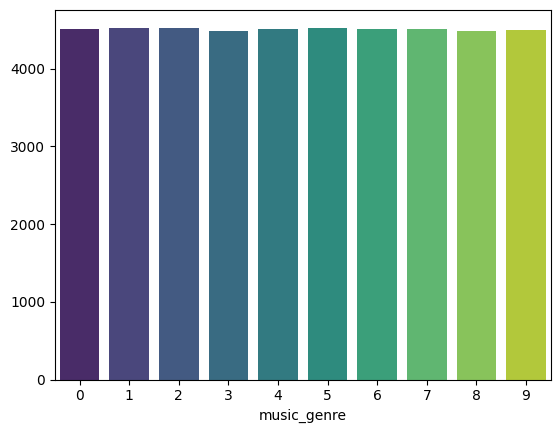

In [ ]:
sns.barplot(x=target.value_counts().index, y=target.value_counts().values, palette="viridis")

Classes are balanced

Data preprocessing

In [ ]:
ssc = StandardScaler()
scaled_features = ssc.fit_transform(features)

In [ ]:
print(scaled_features.min(), scaled_features.max())

-6.156969792006326 41.147082939151936


Splitting dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=.2, stratify=target, random_state=123)

Metrics evaluation

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos["accuracy"] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos["recall"] = recall
    results_pos["precision"] = precision
    results_pos["f1score"] = f_beta
    return results_pos

Logistic Regression

In [ ]:
penalty, solver, multinomial, max_iter, l1_ratio = "elasticnet", "saga", "multinomial", 1000, .5

In [ ]:
logreg = LogisticRegression(random_state=123, penalty=penalty, solver=solver, multi_class=multi_class, max_iter=max_iter, l1_ratio=l1_ratio)

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(l1_ratio=0.5, max_iter=1000, multi_class='multinomial',
                   penalty='elasticnet', random_state=123, solver='saga')

In [ ]:
logreg_preds = logreg.predict(X_test)

In [ ]:
evaluate_metrics(y_test, logreg_preds)

{'accuracy': 0.5301231554421392,
 'recall': array([0.32594235, 0.62762431, 0.47286822, 0.80512249, 0.57095344,
        0.58028793, 0.46008869, 0.42064373, 0.3830735 , 0.65517241]),
 'precision': array([0.3972973 , 0.63322185, 0.4846765 , 0.77078891, 0.45818505,
        0.59613197, 0.45305677, 0.50466045, 0.4461738 , 0.52777778]),
 'f1score': array([0.35809988, 0.63041065, 0.47869955, 0.7875817 , 0.50839092,
        0.58810325, 0.45654565, 0.45883777, 0.41222289, 0.58461538])}

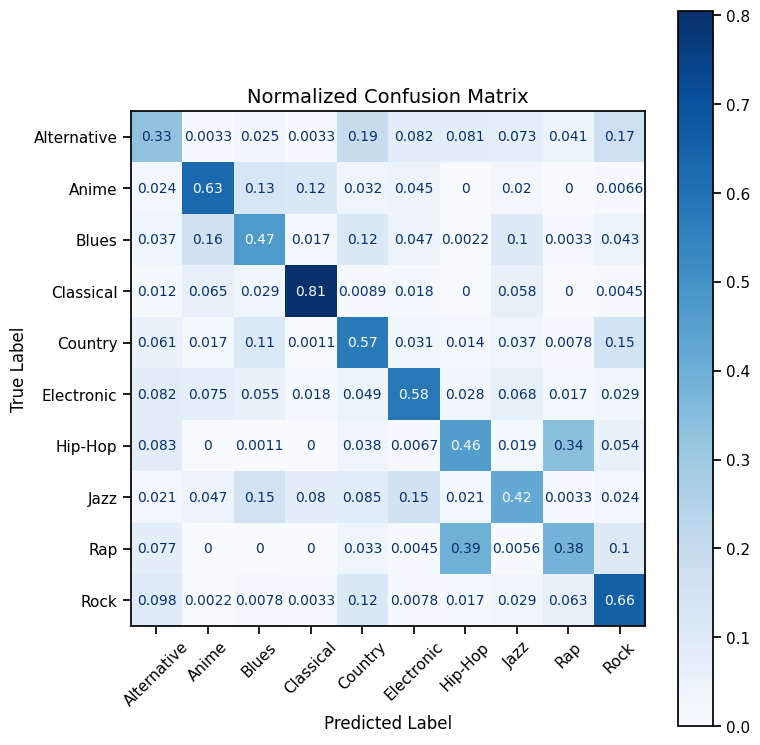

In [ ]:
cf = confusion_matrix(y_test, logreg_preds, normalize="true")

sns.set_context("notebook")
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)


for text in disp.text_.ravel():
    text.set_fontsize(10)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

SVM

In [ ]:
params_grid = {
    "C": [.1, 1, 10],
    "kernel": ["rbf", "poly", "sigmoid"]
}

In [ ]:
svm = SVC()

In [ ]:
import os
print(os.cpu_count())

8


In [ ]:
grid_search = GridSearchCV(estimator=svm,
                          param_grid=params_grid,
                          scoring="accuracy",
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
best_params

{'C': 1, 'kernel': 'rbf'}

In [ ]:
svm_model = SVC(C=1, kernel="rbf")
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [ ]:
evaluate_metrics(y_test, svm_preds)

{'accuracy': 0.5745034949517364,
 'recall': array([0.36807095, 0.74475138, 0.52934662, 0.85300668, 0.55654102,
        0.58250277, 0.51884701, 0.52164262, 0.37416481, 0.69632925]),
 'precision': array([0.4186633 , 0.77116705, 0.60125786, 0.8326087 , 0.54329004,
        0.62693683, 0.44827586, 0.5588585 , 0.44268775, 0.51143791]),
 'f1score': array([0.39174041, 0.75772906, 0.56301531, 0.84268427, 0.54983571,
        0.60390356, 0.48098664, 0.53960964, 0.4055522 , 0.58973151])}

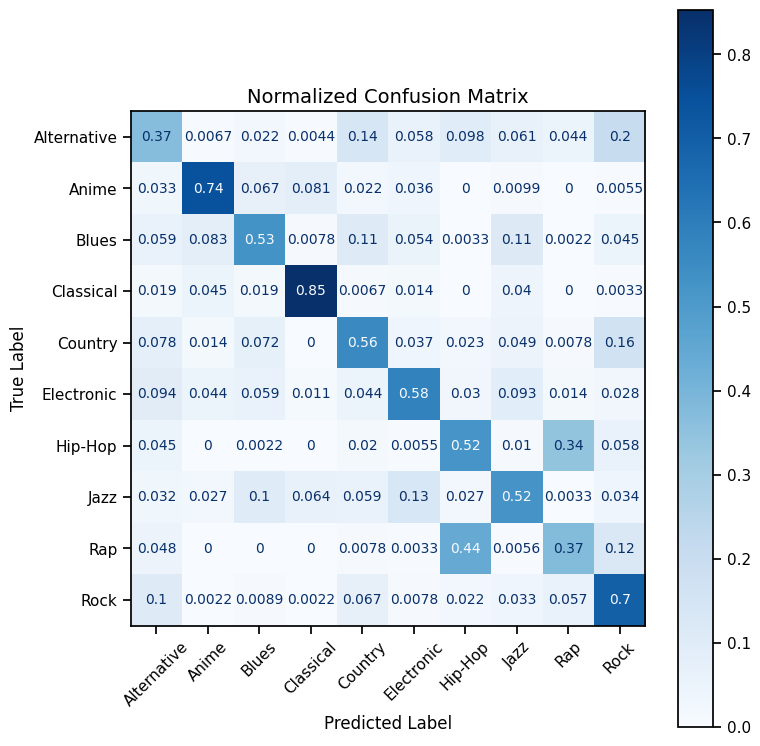

In [ ]:
cf = confusion_matrix(y_test, svm_preds, normalize="true")

sns.set_context("notebook")
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)


for text in disp.text_.ravel():
    text.set_fontsize(10)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

DecisionTree

In [ ]:
params_grid = {

              "criterion": ["gini", "entropy"],
              "max_depth": [5, 10, 15, 20],
              "min_samples_leaf": [1, 2, 5]
}

In [ ]:
dt = DecisionTreeClassifier(random_state=123)

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=params_grid,
                          scoring="accuracy",
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [ ]:
model_dt = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=5, random_state=123)

In [ ]:
model_dt.fit(X_train, y_train)
dt_preds = model_dt.predict(X_test)
evaluate_metrics(y_test, dt_preds)

{'accuracy': 0.5327859758127149,
 'recall': array([0.3037694 , 0.6961326 , 0.46843854, 0.79844098, 0.5421286 ,
        0.47951274, 0.5       , 0.43285239, 0.38530067, 0.72191324]),
 'precision': array([0.39198856, 0.80357143, 0.51711491, 0.81755986, 0.52132196,
        0.52933985, 0.45509586, 0.45034642, 0.41939394, 0.46456693]),
 'f1score': array([0.34228607, 0.74600355, 0.49157467, 0.80788732, 0.53152174,
        0.50319582, 0.47649234, 0.44142615, 0.40162507, 0.56533101])}

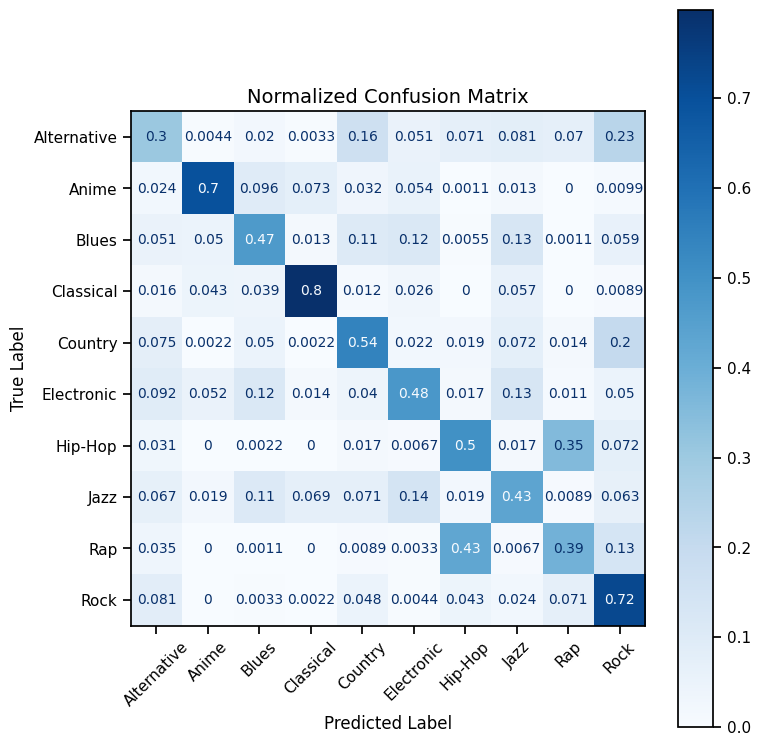

In [ ]:
cf = confusion_matrix(y_test, dt_preds, normalize="true")

sns.set_context("notebook")
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)


for text in disp.text_.ravel():
    text.set_fontsize(10)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
features.columns.values

array(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence'], dtype=object)

XGBoost

In [ ]:
params_grid = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 9],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric="error")

In [ ]:
grid_search = GridSearchCV(estimator=xgb,
                          param_grid=params_grid,
                          scoring="accuracy",
                          cv=5,
                          verbose=1,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:03:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 150,
 'subsample': 0.8}

In [ ]:
model_xgb = XGBClassifier(colsample_bytree=0.8,
                          learning_rate=0.1,
                          max_depth=6,
                          n_estimators=150,
                          subsample=0.8,
                          eval_metric="error")

In [ ]:
model_xgb.fit(X_train, y_train)
xgb_preds = model_xgb.predict(X_test)
evaluate_metrics(y_test, xgb_preds)

{'accuracy': 0.6280927549095751,
 'recall': array([0.40243902, 0.86629834, 0.63122924, 0.88641425, 0.65853659,
        0.63787375, 0.45011086, 0.60710322, 0.41759465, 0.72302558]),
 'precision': array([0.49726027, 0.896     , 0.68923821, 0.89038031, 0.65418502,
        0.71375465, 0.42872228, 0.62229807, 0.40365985, 0.53410025]),
 'f1score': array([0.44485294, 0.88089888, 0.65895954, 0.88839286, 0.65635359,
        0.67368421, 0.4391563 , 0.61460674, 0.41050903, 0.61436673])}

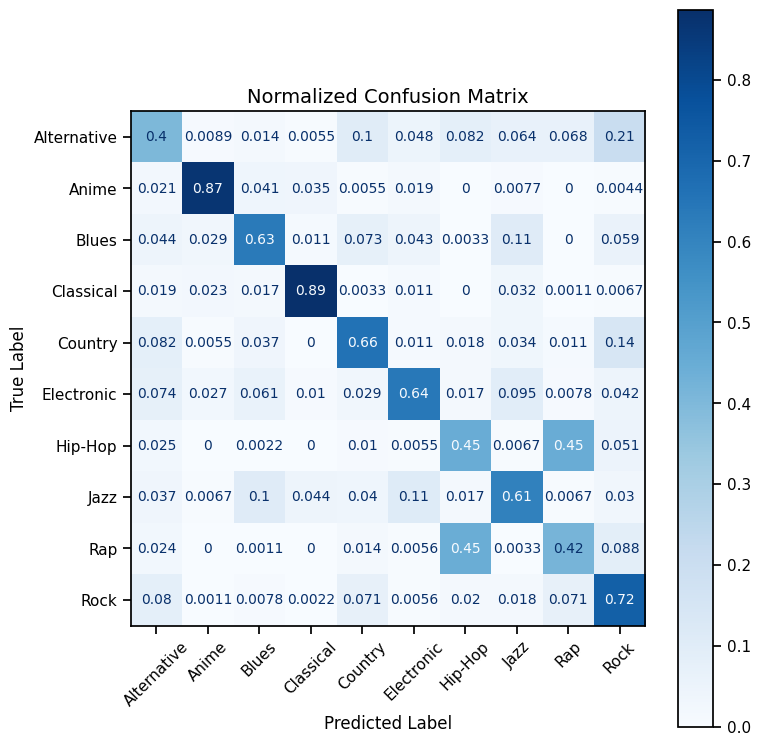

In [ ]:
cf = confusion_matrix(y_test, xgb_preds, normalize="true")

sns.set_context("notebook")
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)


for text in disp.text_.ravel():
    text.set_fontsize(10)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

Neural Network

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.6, random_state=123, stratify=y_test)

In [ ]:
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}\n")

print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}\n")

print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (36048, 16)
y_train: (36048,)

X_val: (2163, 16)
y_val: (2163,)

X_test: (3245, 16)
y_test: (3245,)


In [ ]:
n_features = X_train.shape[1]
print(n_features)
n_classes = np.unique(y_test)
print(n_classes)

16
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


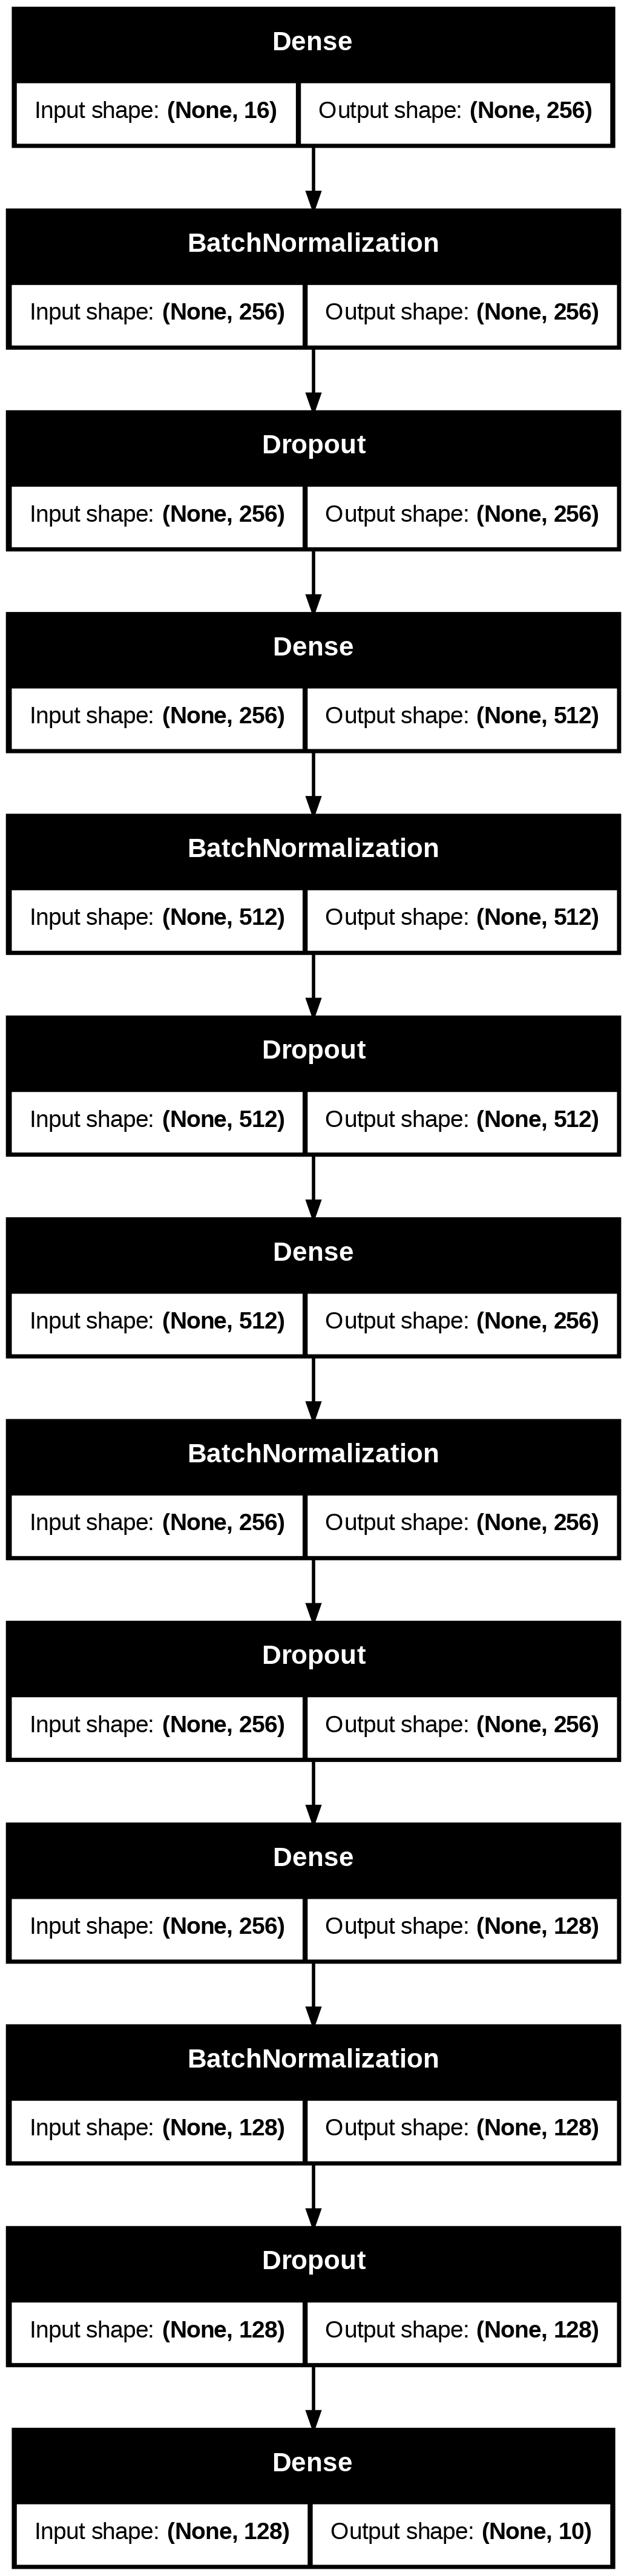

In [ ]:
model = Sequential()

model.add(Dense(units=256, activation="relu", name="dense_1", input_shape=(n_features,)))
model.add(BatchNormalization(name="batch_norm_1"))
model.add(Dropout(.4))

model.add(Dense(units=512, activation="relu", name="dense_2"))
model.add(BatchNormalization(name="batch_norm_2"))
model.add(Dropout(.6))

model.add(Dense(units=256, activation="relu", name="dense_3"))
model.add(BatchNormalization(name="batch_norm_3"))
model.add(Dropout(.6))

model.add(Dense(units=128, activation="relu", name="dense_4"))
model.add(BatchNormalization(name="batch_norm_4"))
model.add(Dropout(.4))

model.add(Dense(units=10, activation="softmax", name="ouput_layer"))
model.build()
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_norm_1 (BatchNormalization)    │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_norm_2 (BatchNormalization)    │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_norm_3 (BatchNormalization)    │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_norm_4 (BatchNormalization)    │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ouput_layer (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 306,058 (1.17 MB)

 Trainable params: 303,754 (1.16 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

In [ ]:
model.compile(optimizer=Adam(learning_rate=.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=50, epochs=100, callbacks=[early_stopping])

Epoch 1/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3104 - loss: 2.1141 - val_accuracy: 0.5381 - val_loss: 1.2488
Epoch 2/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4694 - loss: 1.4249 - val_accuracy: 0.5599 - val_loss: 1.1887
Epoch 3/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4849 - loss: 1.3632 - val_accuracy: 0.5492 - val_loss: 1.1734
Epoch 4/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4975 - loss: 1.3266 - val_accuracy: 0.5687 - val_loss: 1.1658
Epoch 5/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5142 - loss: 1.2957 - val_accuracy: 0.5687 - val_loss: 1.1505
Epoch 6/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5209 - loss: 1.2814 - val_accuracy: 0.5599 - val_loss: 1.1492
Epoch 7/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5198 - loss: 1.2688 - val_accuracy: 0.5761 - val_loss: 1.1365
Epoch 8/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5278 - loss: 1.2553 - val_accu

In [ ]:
score, acc = model.evaluate(X_test, y_test, batch_size=50)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5983 - loss: 1.0527


In [ ]:
print(score, acc)

1.0360251665115356 0.5990754961967468


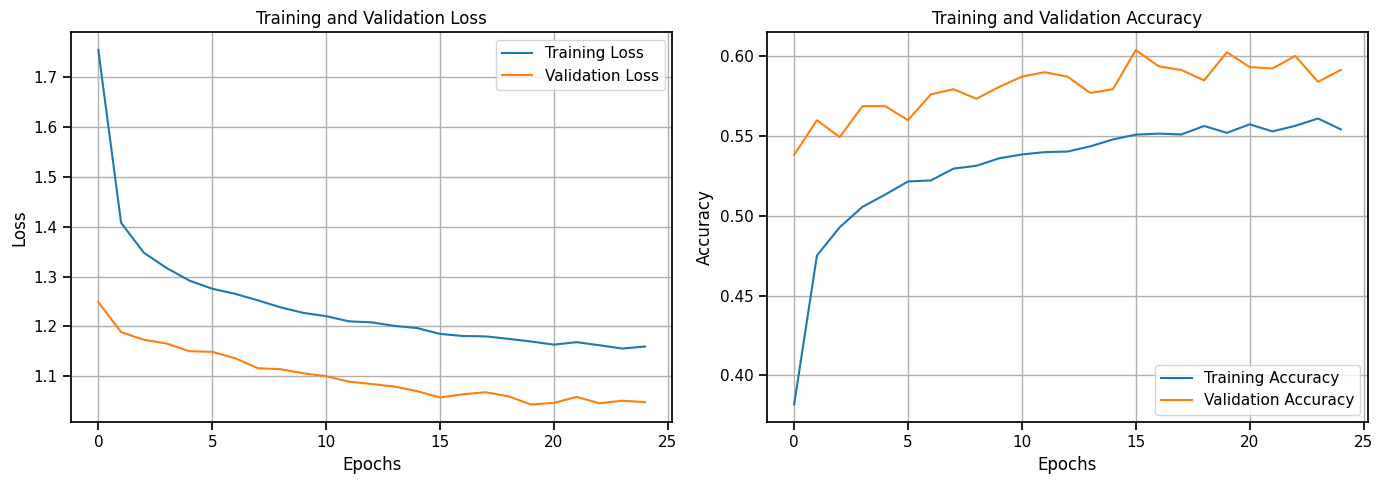

In [ ]:
train_loss, val_loss = history.history["loss"], history.history["val_loss"]
train_acc, val_acc = history.history["accuracy"], history.history["val_accuracy"]
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(train_loss, label="Training Loss")
axs[0].plot(val_loss, label="Validation Loss")
axs[0].set_title("Training and Validation Loss")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(train_acc, label="Training Accuracy")
axs[1].plot(val_acc, label="Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()

In [ ]:
pred_test = model.predict(X_test)
predicted_classes = pred_test.argmax(axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
predicted_classes[:10]

array([8, 2, 4, 0, 6, 4, 5, 3, 0, 4])

In [ ]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.46      0.34      0.40       325
           1       0.82      0.74      0.78       326
           2       0.64      0.58      0.61       325
           3       0.83      0.85      0.84       323
           4       0.58      0.61      0.60       325
           5       0.62      0.62      0.62       325
           6       0.46      0.66      0.54       325
           7       0.63      0.50      0.56       325
           8       0.46      0.31      0.37       323
           9       0.52      0.78      0.63       323

    accuracy                           0.60      3245
   macro avg       0.60      0.60      0.59      3245
weighted avg       0.60      0.60      0.59      3245



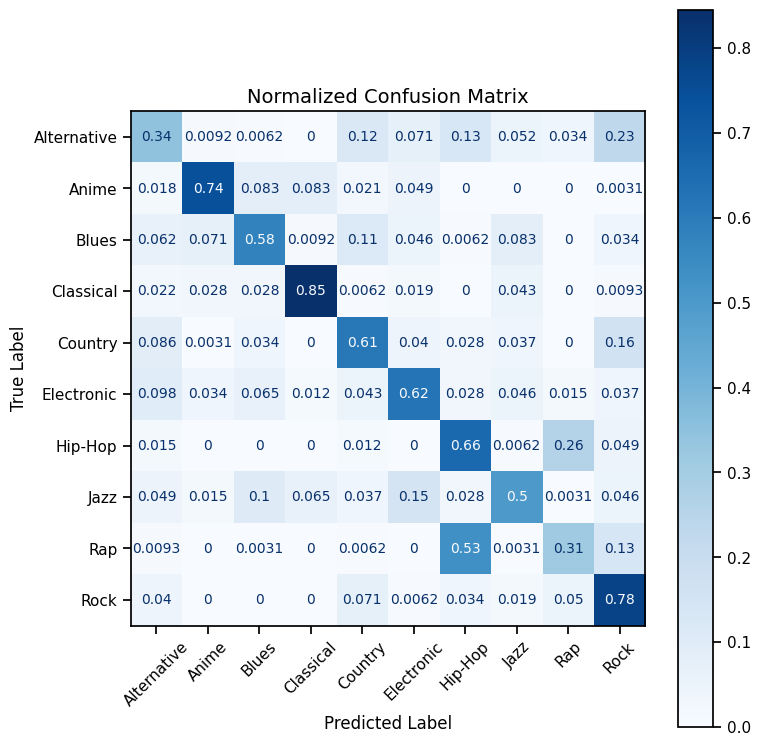

In [ ]:
cf = confusion_matrix(y_test, predicted_classes, normalize="true")

sns.set_context("notebook")
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)


for text in disp.text_.ravel():
    text.set_fontsize(10)

plt.title("Normalized Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()

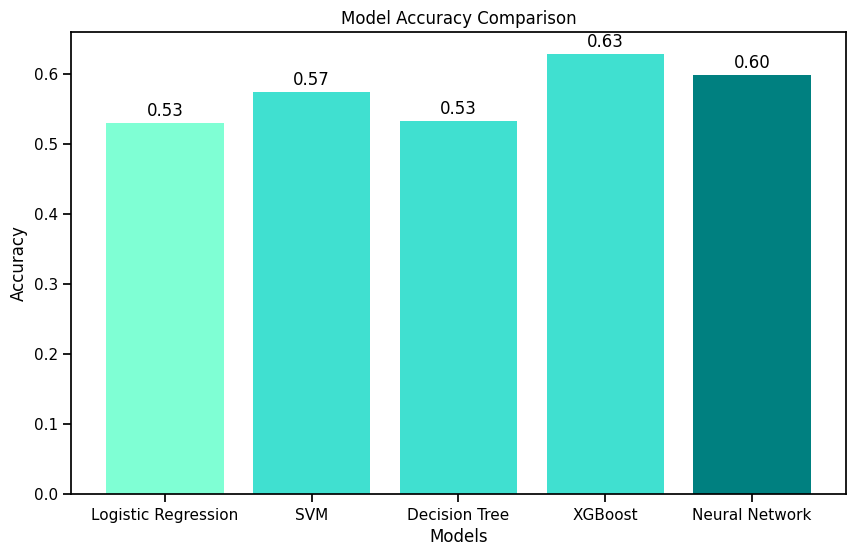

In [ ]:
x = ["Logistic Regression", "SVM", "Decision Tree", "XGBoost", "Neural Network"]
y = [0.5301231554421392, 0.5745034949517364, 0.5327859758127149, 0.6280927549095751, 0.5990754961967468]
colors = ["aquamarine", "turquoise", "turquoise", "turquoise", "teal"]

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i in range(len(x)):
    plt.text(i, y[i] + 0.01, f"{y[i]:.2f}", ha="center")

plt.show()